# Домашнее задание по теме "Методология ведения DS-проектов"

## 1. Понимание бизнеса
### 1.1. Цель
Предсказать экспертную оценку качество вина по шкале от 0 до 10.

### 1.2 Описание
***Выдержка из описания задания на kaggle***  
Набор данных загружен из репозитория машинного обучения UCI.  
Из-за проблем с конфиденциальностью и логистикой доступны только физико-химические (исходные) и сенсорные (выходные) переменные (например, нет данных о сортах винограда, марке вина, продажной цене вина и т. д.).  
Классы упорядочены и не сбалансированы. Актуальность переменных под сомнением, несколько значений были удалены случайным образом.  

***Какие признаки в наличии:***
1. type - тип вина (красное/белое)
2. fixed acidity - фиксированная кислотность
3. volatile acidity - летучая кислотность
4. citric acid - лимонная кислота
5. residual sugar - остаточный сахар
6. chlorides - хлориды
7. free sulfur dioxide - свободный диоксид серы 
8. total sulfur dioxide - общий диоксид серы
9. density - плотность
10. pH - водородный показатель кислотности
11. sulphates - сульфаты
12. alcohol - процент содержания спирта

## 2. Data Understanding  
### 2.1 Import Libraries

In [30]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


import matplotlib.pyplot as plt
import seaborn as sns

### 2.2 Загрузка данных

In [2]:
df = pd.read_csv('winequalityN.csv')
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


### 2.2.1 Посмотрим на переменные

In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


Что можно сказать: среднее качество вина - 5,82. Минимальное значение - 3. Разве нет самых некачественных в выборке?  
    Еще можно заметить, что в составе не всегда присутствует, например, лимонная кислота, а свободный диоксид серы имеет достаточно сильный разброс. Вероятно,  в столбце есть выбросы. То же можно сказать об общем диоксиде серы.

Также достаточно явны пропуски в данных:

In [5]:
df.isna().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

Построим тепловую карту на основе матрицы корреляции, чтобы посмотреть, какие переменные коррелируют с целевой:

Text(0.5, 1.0, 'Тепловая карта корреляции переменных датасета wine df')

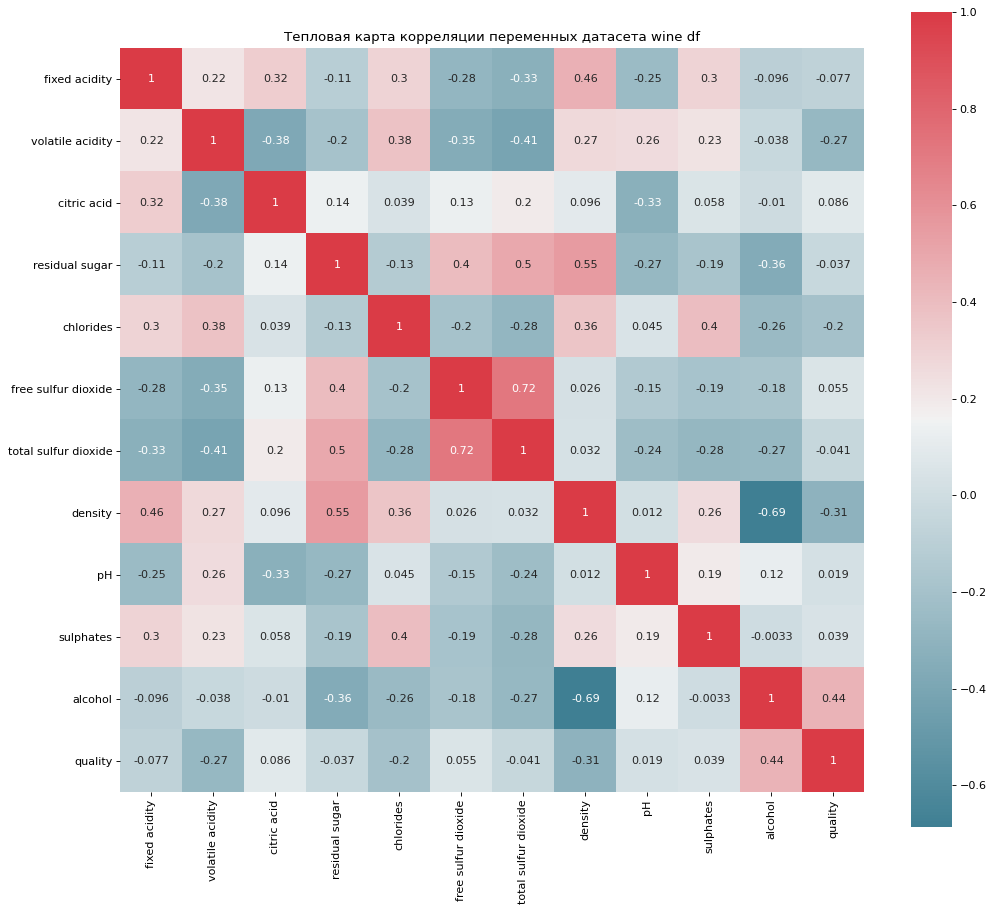

In [6]:
plt.figure(figsize=(15,15), dpi=80) 
sns.heatmap(df.corr(), square=True, cbar_kws = {'shrink': .9}, 
            cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True, annot_kws = {'fontsize': 10})
plt.title("Тепловая карта корреляции переменных датасета wine df")

Что мы видим: переменные-сульфаты коррелируют друг с другом. Также довольно сильная обратная корреляция между плотностью и процентом содержания алкоголя.  
Что же касается целевой переменной, то на нее влияет в достаточной степени процент содержания алкоголя, плотность и летучая кислотность. Поскольку мы отметили корреляцию между переменными выше, возможно, в перспективе стоит выбрать только один признак: либо alcohol, либо density.  
Также оставить можно хлориды и общий диоксид серы. Поскольку диоксиды, как писали выше, коррелируют между собой, оставим только total sulfur dioxide.

Теперь мы можем выделить только те признаки, на которых можно построить хорошую модель.

Теперь посмотрим, какие вина представлены в датасете:

In [7]:
df.type.unique()

array(['white', 'red'], dtype=object)

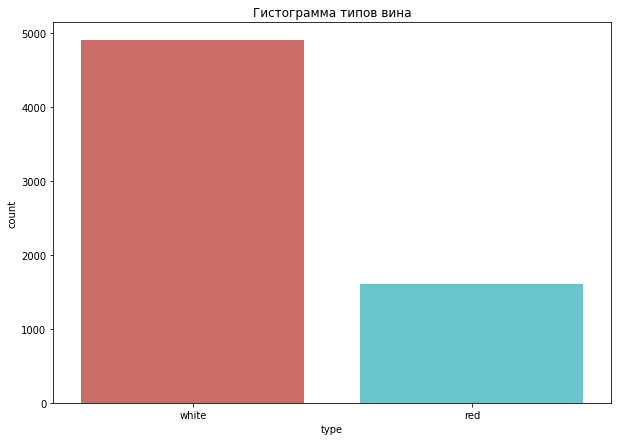

In [8]:
plt.figure(figsize=(10,7))
sns.countplot(x='type', data=df, palette='hls')
plt.title('Гистограмма типов вина')
plt.show()

Красное вино представлено в гораздо меньшем количестве, чем белое. Разница составляет примерно 1:3.  

Перейдем к целевой переменной и вспомним про упоминание дисбаланса классов в начале, а также более явное упоминание об этом при статистическом анализе датафрейма:

<AxesSubplot:title={'center':'Дисбаланс классов целевой переменной'}, xlabel='quality', ylabel='count'>

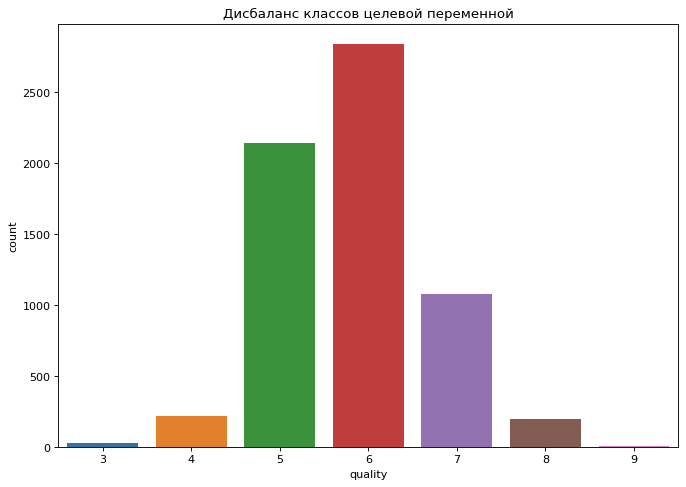

In [9]:
plt.figure(figsize=(10,7), dpi=80)  
plt.title('Дисбаланс классов целевой переменной')
sns.countplot(x='quality',data=df)

Итак, действительно на лицо явный дисбаланс. Классов 0, 1 и 2 нет совсем, а классы 9 и 3 представлены в совсем малом количестве. Придется поработать с выборкой.

## 3. Data Preparation

### 3.1 Преобразуем категориальные переменные в числовые

In [10]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Итак, у нас только один столбец с категориальными переменными - type. Посмотрим, какие значения встречаются в столбце:

Преобразуем при помощи OneHotEncoding:

In [11]:
df['type_ohe'] = pd.get_dummies(df.type, drop_first=True)
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_ohe
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1


### 3.2 Заполняем пропуски

Вспомним, в каких столбцах есть пропуски:

In [12]:
df.isna().sum().sort_values(ascending=False)

fixed acidity           10
pH                       9
volatile acidity         8
sulphates                4
citric acid              3
residual sugar           2
chlorides                2
type                     0
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
alcohol                  0
quality                  0
type_ohe                 0
dtype: int64

Поскольку не хочется создавать новый фрейм, выберем все столбцы, в которых нужно заполнить пропуски и заполним их средним:

In [13]:
df[['fixed acidity', 'pH', 'volatile acidity', 'sulphates',
    'citric acid', 'residual sugar', 'chlorides']] = \
df[['fixed acidity', 'pH', 'volatile acidity', 'sulphates',
    'citric acid', 'residual sugar', 'chlorides']].apply(lambda x: x.fillna(x.mean()),axis=0)

In [14]:
df.isna().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type_ohe                0
dtype: int64

Почему заполнили средним: среди столбцов с пропусками только столбец chlorides оказывает заметное влияние на целевую переменную. В нем всего 2 пропуска (порядка 0,03% данных), поэтому заполнение средним в данном случае не повлияет на работу модели.       

### 3.3 Смотрим на важность признаков

На основе матрицы корреляции мы предположили, какие именно признаки могут быть важными в обучении модели. Посмотрим на важность признаков, обучив дерево решений:

<AxesSubplot:>

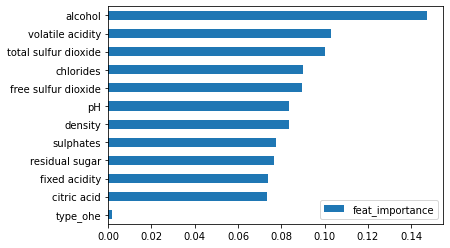

In [15]:
tree = DecisionTreeClassifier(random_state=42)
tree.fit(df.drop(['type', 'quality'],axis=1), df['quality'])
feat_imp = pd.DataFrame(tree.feature_importances_, 
                        columns=['feat_importance'], 
                        index = df.drop(['type', 'quality'],axis=1).columns).sort_values(['feat_importance'], ascending=True)

feat_imp.plot(kind='barh')

На первом месте закономерно градус напитка. Total sulfur dioxide также в тройке лидеров, что тоже понятно - ведь этот признак коррелировал с целевым. Второе место неожиданно досталось летучей кислотности. Видимо, для дерева решений этот признак действительно был важен.  
Возьмем первые 5 наиболее важных признаков + плотность напитка, т.к. она корредировала в качеством. Итого у нас получится 6 фичей.

Формируем датафрейм фичей из необходимых признаков.

In [16]:
features = df[['alcohol', 'volatile acidity', 'total sulfur dioxide', 'chlorides', 'free sulfur dioxide', 'density']]

In [17]:
target = df.quality

### 3.4 Убираем дисбаланс классов

Посмотрим на процентное соотношение классов к общему числу строк и заодно снова построим гистограмму распределения классов:

Class=6, n=2836 (43.651%)
Class=5, n=2138 (32.907%)
Class=7, n=1079 (16.608%)
Class=8, n=193 (2.971%)
Class=4, n=216 (3.325%)
Class=3, n=30 (0.462%)
Class=9, n=5 (0.077%)


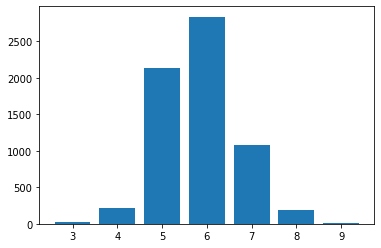

In [18]:
counter = Counter(target)
for k,v in counter.items():
    per = v / len(target) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

plt.bar(counter.keys(), counter.values())
plt.show()

Итак, прекрасно видно, что классов 6 и 5 больше, а значит именно они будут предсказываться лучше остальных. Классы 3 и 9, очевидно, предсказываться не будут вообще.  
Будем делать upsampling.  
Для этого воспользуемся классом SMOTE:

Class=6, n=2836 (14.286%)
Class=5, n=2836 (14.286%)
Class=7, n=2836 (14.286%)
Class=8, n=2836 (14.286%)
Class=4, n=2836 (14.286%)
Class=3, n=2836 (14.286%)
Class=9, n=2836 (14.286%)


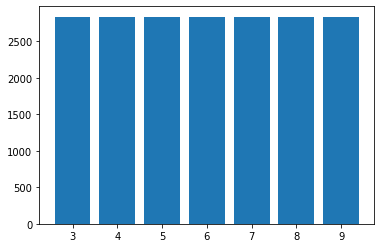

In [19]:
oversample = SMOTE(k_neighbors=4)
features, target = oversample.fit_resample(features, target)


counter = Counter(target)
for k,v in counter.items():
    per = v / len(target) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

In [20]:
features.shape, target.shape

((19852, 6), (19852,))

Теперь у нас классы сбалансированы.

### 3.5 Делим выборку на обучающую и тестовую

In [21]:
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=42, shuffle=True)

features_train.shape, target_train.shape, features_valid.shape, target_valid.shape

((14889, 6), (14889,), (4963, 6), (4963,))

### 3.6 Используем pipeline для нормализации признаков и обучения модели

In [22]:
pipeline = Pipeline([
    ('normalizer', StandardScaler()), #Step1 - normalize data
    ('clf', LogisticRegression()) #step2 - classifier
])
pipeline.steps

[('normalizer', StandardScaler()), ('clf', LogisticRegression())]

## 4. Моделирование  
### 4.1 Выбор модели

Добавим несколько моделей, обучим их и оценим скор, чтобы выбрать лучшую модель для данной задачи:

In [23]:
%%time
clfs = []
clfs.append(LogisticRegression())
clfs.append(SVC())
clfs.append(KNeighborsClassifier(n_neighbors=3))
clfs.append(DecisionTreeClassifier())
clfs.append(RandomForestClassifier())
clfs.append(GradientBoostingClassifier())

for classifier in clfs:
    pipeline.set_params(clf = classifier)
    scores = cross_validate(pipeline, features_train, target_train)
    print('---------------------------------')
    print(str(classifier))
    print('-----------------------------------')
    for key, values in scores.items():
            print(key,' mean ', values.mean())
            print(key,' std ', values.std())

---------------------------------
LogisticRegression()
-----------------------------------
fit_time  mean  0.9464245319366456
fit_time  std  0.16872230969621443
score_time  mean  0.006203317642211914
score_time  std  0.0008618424183037611
test_score  mean  0.4597354285248919
test_score  std  0.004939765148052744
---------------------------------
SVC()
-----------------------------------
fit_time  mean  6.477628135681153
fit_time  std  0.1605070203564062
score_time  mean  1.9340186595916748
score_time  std  0.015322342525738409
test_score  mean  0.5968826370429392
test_score  std  0.011176416865432182
---------------------------------
KNeighborsClassifier(n_neighbors=3)
-----------------------------------
fit_time  mean  0.022573375701904298
fit_time  std  0.000155316381183168
score_time  mean  0.2585580348968506
score_time  std  0.023788467641721253
test_score  mean  0.7762105400413692
test_score  std  0.0026134364293841548
---------------------------------
DecisionTreeClassifier()
---

Самый лучший результат показала модель случайного леса.

### 4.2 Подбор гиперпараметров и обучение модели

Подберем параметры для выбранной модели при помощи GridSearchCV:

In [24]:
pipeline.set_params(clf=RandomForestClassifier())
pipeline.steps

[('normalizer', StandardScaler()), ('clf', RandomForestClassifier())]

In [25]:
%%time

params = {"max_depth": [5, 10, 20],
          "max_features": [1, 3, 5],
          "min_samples_split": [2, 3, 4],
          "min_samples_leaf": [3, 4, 5],
          "n_estimators": [200, 250, 500],
          "criterion": ["gini", "entropy"]}

rf_grid = GridSearchCV(estimator=pipeline[1], param_grid=params, verbose=3, n_jobs=-1, cv=3)
rf_detector = rf_grid.fit(features_train, target_train)

Fitting 3 folds for each of 486 candidates, totalling 1458 fits
CPU times: user 25.2 s, sys: 1.81 s, total: 27 s
Wall time: 18min 43s


In [26]:
rf_detector.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 200}

In [27]:
rf_detector.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=20, max_features=3,
                       min_samples_leaf=3, n_estimators=200)

## 5. Оценка
### 5.1 Модель

In [28]:
rf_detector.best_score_

0.8124790113506615

In [29]:
best = rf_detector.best_estimator_
print('Model Score: ', accuracy_score(y_pred = best.predict(features_valid), y_true = target_valid))

Model Score:  0.846665323393109


Итак, accuracy на тестовой выборке позволяет сделать вывод, что модель для более чем 83% объектов довольно успешно предсказывает экспертную оценку качества вина.

### 5.2 Матрица ошибок

Посмотрим, какие классы модель предсказывает хуже:

In [34]:
confusion_matrix(target_valid, best.predict(features_valid))

array([[721,   2,   1,   0,   0,   0,   0],
       [  9, 650,  26,  10,   3,   0,   0],
       [ 12,  57, 503,  90,  33,  12,   0],
       [  4,  33, 141, 392, 117,  38,   1],
       [  4,  12,  17,  58, 573,  36,   6],
       [  0,   3,   1,   8,  25, 698,   1],
       [  0,   0,   0,   1,   0,   0, 665]])

<AxesSubplot:>

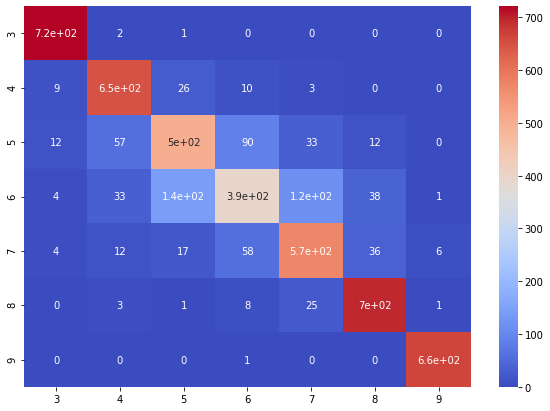

In [37]:
plt.figure(figsize = (10,7))
sns.heatmap(pd.DataFrame(confusion_matrix(target_valid, best.predict(features_valid)), index = [3,4,5,6,7,8,9],
                  columns = [3,4,5,6,7,8,9]), annot=True, cmap="coolwarm")

Итак, хуже всего опознаются вина класса 6. Модель часто относит объекты к соседним классам - 5 и 7. Лучше всего определяются вина классов 3, 8, 9 и 4. Видимо, их признаки действительно лучше выражены и модель лучше обучилась на них.

## 6. Развертывание

В данном случае на этом этапе мы сохраняем результаты предсказания в файл формата .csv:

In [38]:
predict = best.predict(features_valid)

In [39]:
test = pd.DataFrame({'Id': target_valid.index, 'Predict': predict})
print(test.shape)
test.head()

(4963, 2)


,Id,Predict
0,1901,4
1,9512,4
2,5140,5
3,8660,3
4,438,7


In [40]:
test.to_csv('Wine Quality Predict.csv', index=False)